### Are f1 scores correlated with cosine similarity or jaccard similarity?

In [1]:
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

models_and_filters = ['Social Media','News','Conversation','Wiki & Books','Legal','dannet' ,"Web"]

with open("f1_scores/f1_scores_regularized_third.pkl", "rb") as fp:
    reg_f1 = pickle.load(fp)

with open("data/jaccard.pkl", "rb") as fp:
    jaccard = pickle.load(fp)
    jaccard.pop(None)

with open("data/similarity.pkl", "rb") as fp:
    similarity = pickle.load(fp)



FileNotFoundError: [Errno 2] No such file or directory: 'data/jaccard.pkl'

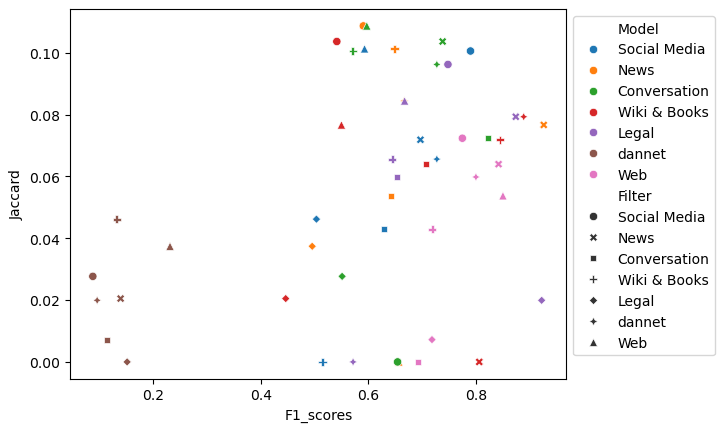

In [7]:
dfs = []

for model_type in models_and_filters:
    dfs.append(pd.DataFrame({'Model': [model_type]*7, 
                'Filter': reg_f1[model_type].keys(),
                'F1_scores': reg_f1[model_type].values(),
                "Cosine": similarity[model_type].values(),
                "Jaccard": jaccard[model_type].values()}))

plotting_df = pd.concat(dfs)


ax = sns.scatterplot(data=plotting_df, x="F1_scores", y="Jaccard", hue="Model",style="Filter")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

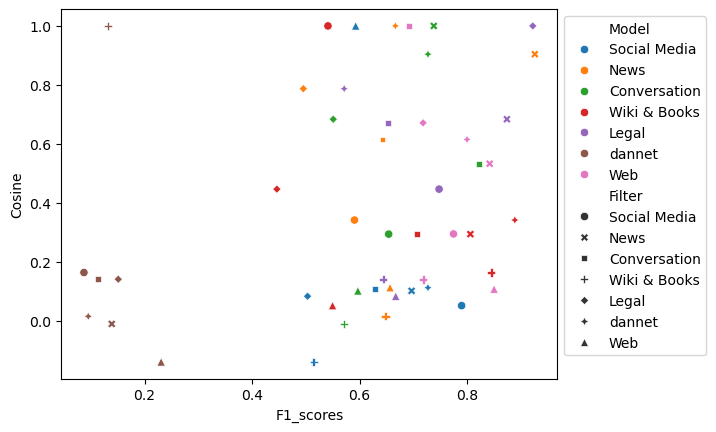

In [8]:
ax = sns.scatterplot(data=plotting_df, x="F1_scores", y="Cosine", hue="Model",style="Filter")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### F1 scores on target domain for all baseline models

In [9]:
def load_f1scores_from_dict(f1):

    dfs = []

    for model_type in models_and_filters:
        dfs.append(pd.DataFrame({'Model': [model_type]*7, 
                    'Filter': f1[model_type].keys(),
                    'F1_scores': f1[model_type].values()}))
    
    return pd.concat(dfs).pivot(index="Model", columns="Filter", values="F1_scores")


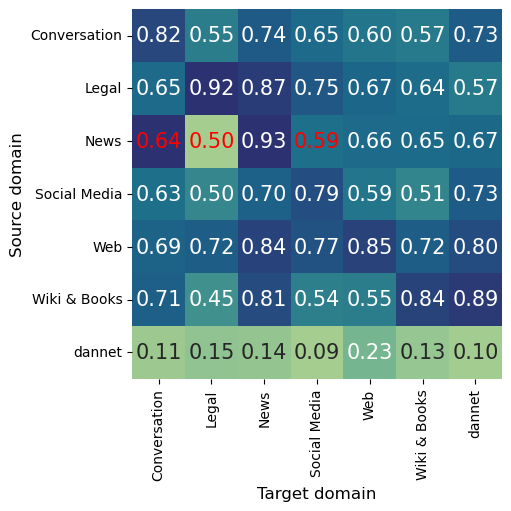

In [10]:
df = load_f1scores_from_dict(reg_f1)

mask = np.zeros_like(df)
mask[2, [0, 1, 3]] = 1  

fig, ax = plt.subplots()
sns.heatmap(df, 
            annot=True, 
            fmt='.2f',
            cmap=sns.color_palette("crest", as_cmap=True), 
            ax=ax, 
            annot_kws={"fontsize": 15}, 
            cbar=False,
            mask=mask,
            square=True)

# Define a custom annotation function to apply red color to the masked cells
def annotate_red(x):
    if x == '':
        return {'color': 'red', 'fontsize': 15}
    else:
        return {'fontsize': 15}

# Apply the custom annotation function directly to annot_kws
sns.heatmap(df, 
            annot=True, 
            fmt='.2f',
            cmap='crest', 
            ax=ax, 
            annot_kws=annotate_red(''),  # Pass the desired dictionary directly
            cbar=False,
            mask=np.logical_not(mask),  
            square=True)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
plt.xlabel('Target domain')
plt.ylabel('Source domain')
plt.show()


In [11]:
import pickle

with open("f1_scores/f1_scores_active_learning_third_all_domains.pkl", "rb") as fp:
    ALS_f1 = pickle.load(fp)



def active_learning_comparison(f1_scores: dict,target_domains:list[str]):
    dfs = []
    for target_domain in target_domains:
        for model in f1_scores.keys():
            if target_domain in model:
                print(target_domain, model)
                dfs.append(pd.DataFrame({
                    "Source": [model],
                    "Target": [target_domain],
                    "Type": [model.split("_")[-1].capitalize() if "none" not in model else "none" +model.split("_")[-1].capitalize()],
                    "F1": [f1_scores[model][target_domain]]
                }))

    return pd.concat(dfs).pivot(index="Type", columns="Target",values="F1")


active_learning_comparison(ALS_f1, ["Legal", "Conversation", "Social Media"])




Legal model_News_Legal_margin
Legal model_News_Legal_confidence
Legal model_News_Legal_random
Conversation model_News_Conversation_margin
Conversation model_News_Conversation_confidence
Conversation model_News_Conversation_random
Social Media model_News_Social Media_margin
Social Media model_News_Social Media_confidence
Social Media model_News_Social Media_random


Target,Conversation,Legal,Social Media
Type,,,
Confidence,0.803468,0.871849,0.781818
Margin,0.789333,0.898608,0.787879
Random,0.805405,0.866880,0.722222


# F1 score vs. pct of data used

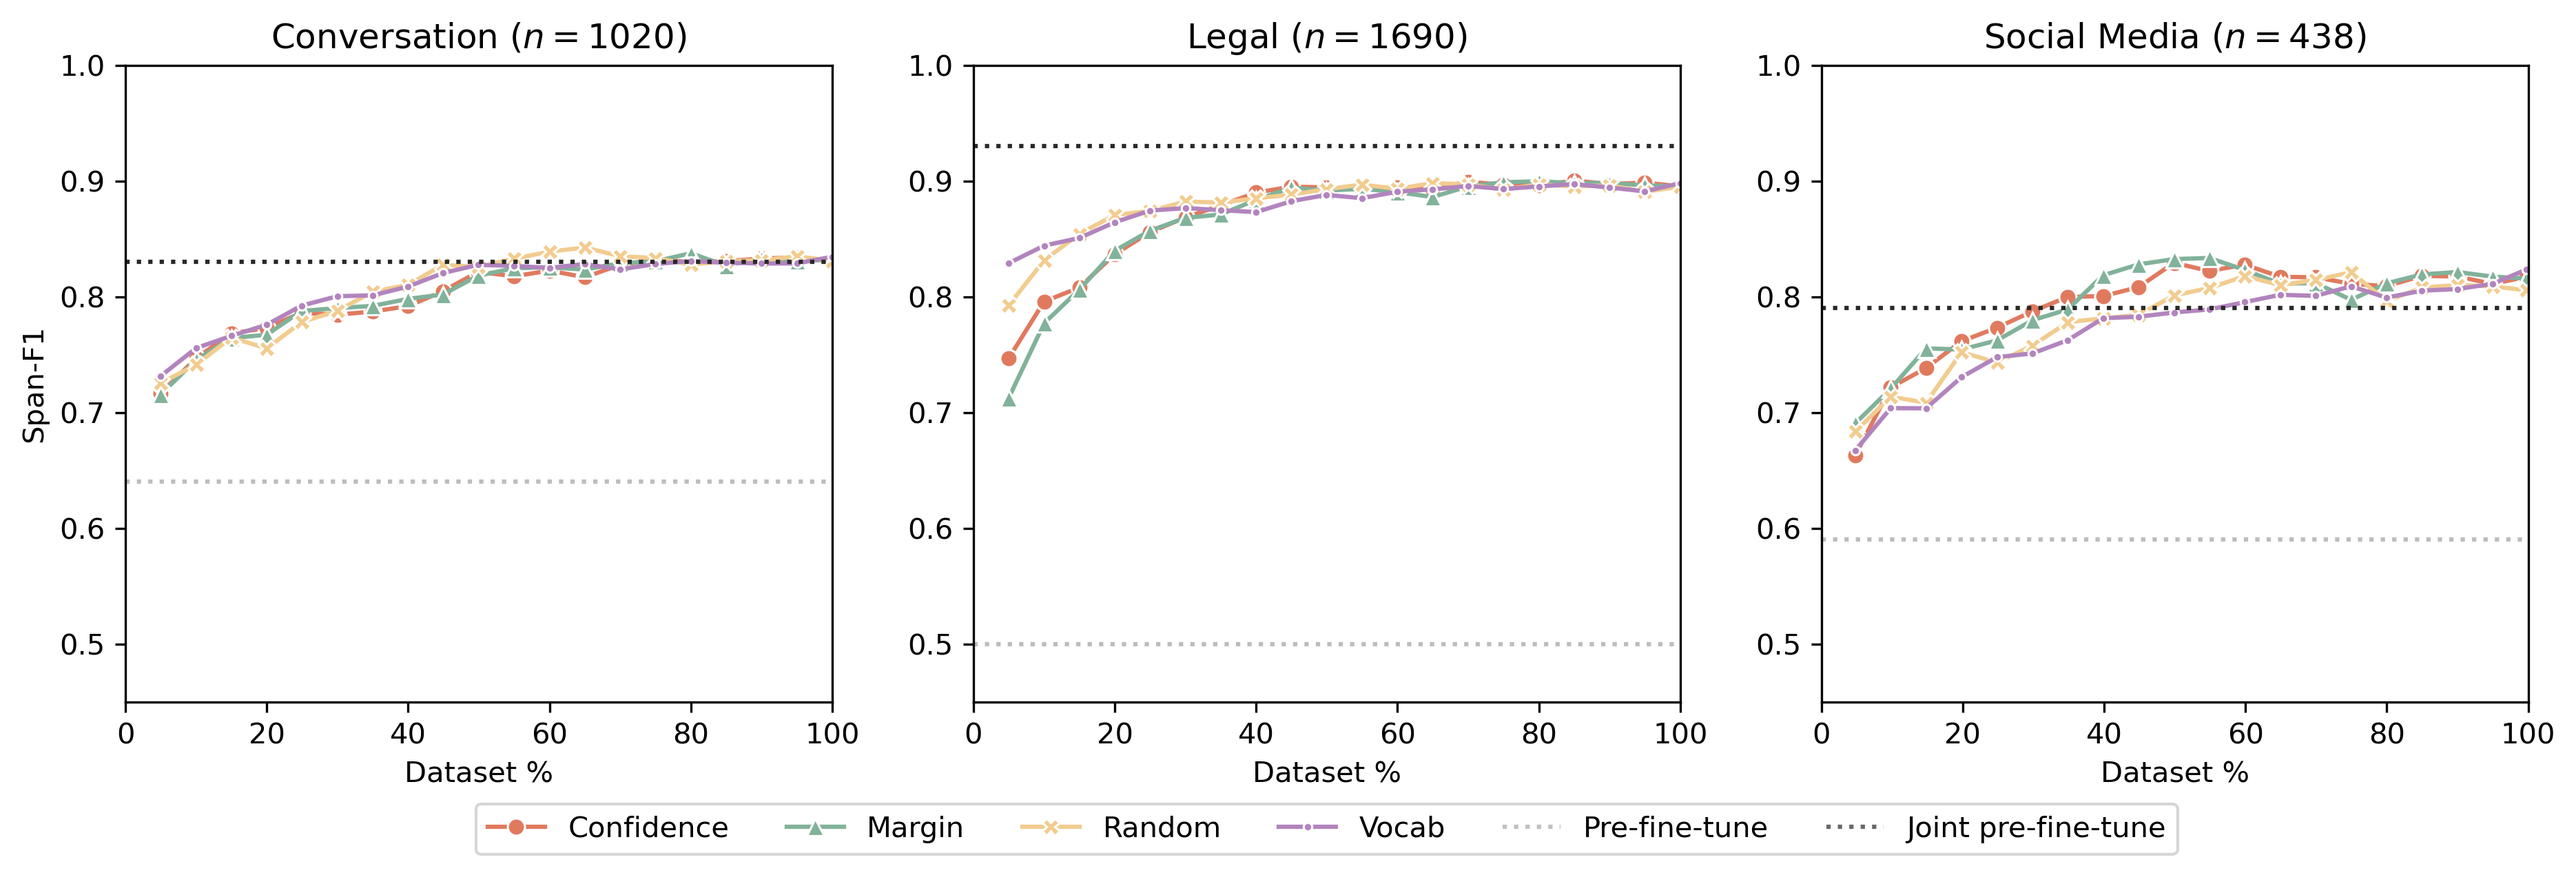

In [7]:

conv_conf_df   = pd.read_csv("al_results/final/ALResult_News_Conversation_confidence_final.csv")
conv_margin_df = pd.read_csv("al_results/final/ALResult_News_Conversation_margin_final.csv")
conv_random_df = pd.read_csv("al_results/final/ALResult_News_Conversation_random_final.csv")
conv_vocab_df  = pd.read_csv("al_results/final/ALResult_News_Conversation_vocab_final.csv")

legal_conf_df   = pd.read_csv("al_results/final/ALResult_News_Legal_confidence_final.csv")
legal_margin_df = pd.read_csv("al_results/final/ALResult_News_Legal_margin_final.csv")
legal_random_df = pd.read_csv("al_results/final/ALResult_News_Legal_random_final.csv")
legal_vocab_df  = pd.read_csv("al_results/final/ALResult_News_Legal_vocab_final.csv")

some_conf_df   = pd.read_csv("al_results/final/ALResult_News_Social Media_confidence_final.csv")
some_margin_df = pd.read_csv("al_results/final/ALResult_News_Social Media_margin_final.csv")
some_random_df = pd.read_csv("al_results/final/ALResult_News_Social Media_random_final.csv")
some_vocab_df  = pd.read_csv("al_results/final/ALResult_News_Social Media_vocab_final.csv")

# combining the data frames into a data frame for each domain
conv_df = pd.concat([conv_conf_df, conv_margin_df, conv_vocab_df,conv_random_df])
legal_df = pd.concat([legal_conf_df, legal_margin_df, legal_vocab_df, legal_random_df])
some_df = pd.concat([some_conf_df, some_margin_df,some_vocab_df, some_random_df])


# creating a list of method for each of the three target domains
conv_len = len(conv_conf_df)
conv_method = ['confidence']*conv_len + ['margin']*conv_len + ['random']*conv_len + ['vocab']*conv_len

legal_len = len(legal_conf_df)
legal_method = ['confidence']*legal_len + ['margin']*legal_len + ['random']*legal_len+ ['vocab']*legal_len

some_len = len(some_conf_df)
some_method = ['confidence']*some_len + ['margin']*some_len + ['random']*some_len+ ['vocab']*some_len


# adding the method column to each of the combined data frames
conv_df['method'] = conv_method
legal_df['method'] = legal_method
some_df['method'] = some_method

conv_df["percentage_of_samples"] = conv_df["percentage_of_samples"] * 100
legal_df["percentage_of_samples"] = legal_df["percentage_of_samples"] * 100
some_df["percentage_of_samples"] = some_df["percentage_of_samples"] * 100

# increasing dpi for higher resolution
mpl.rcParams['figure.dpi'] = 300

# ranges of axes
x_min, x_max = 0, 100
y_min, y_max = 0.45 , 1


n_cols, n_rows = 3,1
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,4))
dfs = [conv_df, legal_df, some_df]
dfs = [df.replace({'method': {'confidence': 'Confidence', 'margin': 'Margin', 'random': 'Random', 'vocab':'Vocab'}}) for df in dfs]
custom_colors = {'confidence': '#e07a5f', 'margin': '#81b29a', 'random': '#f2cc8f', 'vocab': '#b284be'}
n_methods = len(custom_colors)
markers = {'confidence': 'o', 'margin': '^', 'random': 'X', 'vocab':'.'}
titles = ['Conversation ($n = 1020$)', 'Legal ($n = 1690$)', 'Social Media ($n = 438$)']
baseline_values = [0.64, 0.5, 0.59]
finetune_values = [0.83, 0.93, 0.79]

for row in range(n_cols):
    for method, marker in markers.items():
        sns.lineplot(data=dfs[row][dfs[row]['method'] == method.capitalize()],  # Use capitalized method name
                        x='percentage_of_samples', 
                        y='f1', 
                        color=custom_colors[method], 
                        linestyle='-', 
                        marker=marker, 
                        ax=ax[row],
                        label=method.capitalize() if row == n_rows-1 else None)  # Use capitalized method name
    ax[row].set_xlabel('Dataset %')
    if row == 0:
        ax[row].set_ylabel('Span-F1')
    else:
        ax[row].set_ylabel('')
    ax[row].set_title(titles[row])
    ax[row].set_xlim([x_min, x_max])
    ax[row].set_ylim([y_min, y_max])
    ax[row].axhline(y=baseline_values[row], linewidth=1.5, color='#bdbdbd', ls=':')
    ax[row].axhline(y=finetune_values[row], linewidth=1.5, color='#292927', ls=':')

# Manually add constant lines to the legend
handles, labels = ax[0].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='silver', linestyle=':', label='Pre-fine-tune'),
                plt.Line2D([0], [0], color='dimgray', linestyle=':', label='Joint pre-fine-tune')])
ax[0].legend(handles=handles, labels=labels + ['Pre-fine-tune', 'Joint pre-fine-tune'], loc='center', bbox_to_anchor=(1.7, -0.2), ncol=6)
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

# F1 score heatmap

<Axes: xlabel='Filter', ylabel='Model'>

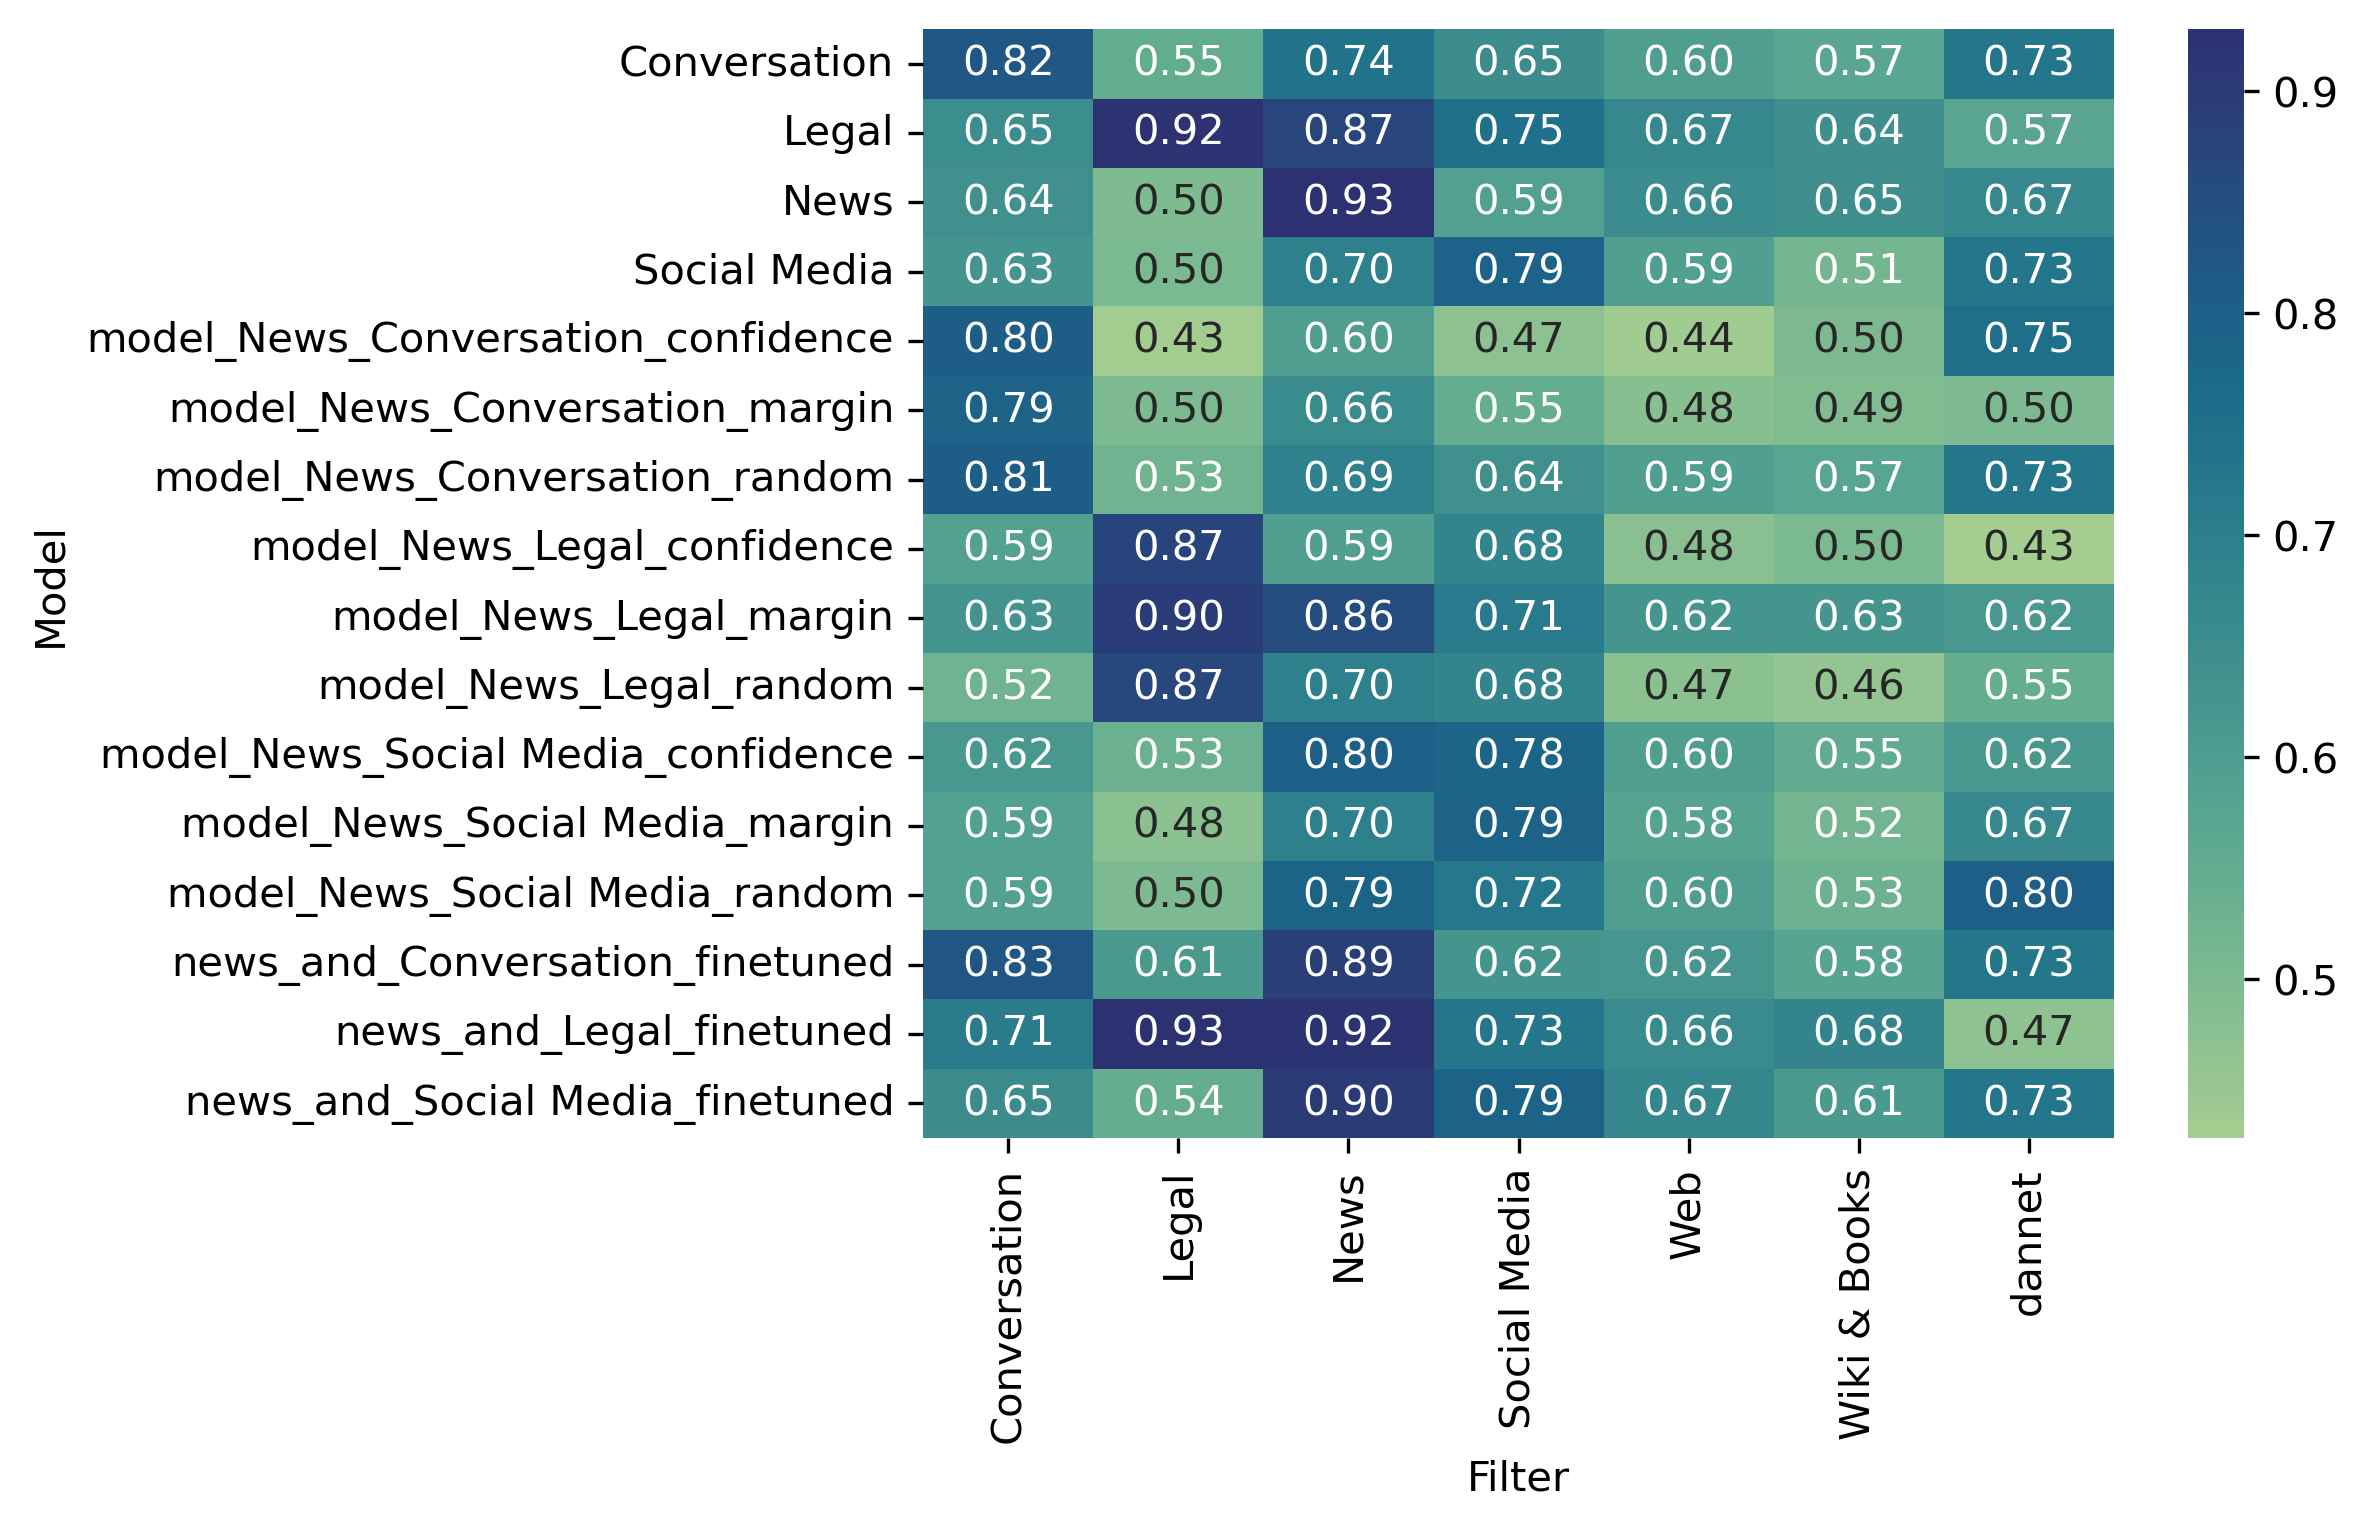

In [14]:
reg2_f1 = {key: val for key, val in reg_f1.items() if key in ["Social Media", "Conversation","Legal","News"]}


with open("f1_scores/f1_scores_news_on_filter.pkl", "rb") as fp:
    news_on_filter_f1 = dict()
    for key, val in pickle.load(fp).items():
        val.pop(None)
        news_on_filter_f1[key] = val


news_on_filter_f1.update(ALS_f1)
news_on_filter_f1.update(reg2_f1)

dfs = []


for model_type in news_on_filter_f1.keys():
    dfs.append(pd.DataFrame({'Model': [model_type]*7, 
                'Filter': news_on_filter_f1[model_type].keys(),
                'F1_scores': news_on_filter_f1[model_type].values()}))



sns.heatmap(pd.concat(dfs).pivot(index="Model", columns="Filter", values="F1_scores"), 
            annot=True, 
            fmt='.2f',
            cmap=sns.color_palette("crest", as_cmap=True))